# Does KernelSHAP do what it is supposed to? In the multiplicative sense

## Setup

In [1]:
import numpy as np
import pandas as pd
import shap
import xgboost as xgb
from siuba import _, select

## Data

In [9]:
np.random.seed(25)

# Get the Predictors
a_really_ong_variable_name = np.random.uniform(low = 0, high = 1, size = 10000)
x2 = np.random.uniform(low = 0, high = 1, size = 10000)
d = {"a_really_ong_variable_name":a_really_ong_variable_name, "x2":x2}
X = pd.DataFrame(data = d)

# Get the three different responses
y1 = a_really_ong_variable_name + x2
y2 = 2 * a_really_ong_variable_name + 2 * x2
y3 = (a_really_ong_variable_name + x2) * (2 * a_really_ong_variable_name + 2 * x2)

# Make the data for the 3 models
d1 = xgb.DMatrix(X, label=y1)
d2 = xgb.DMatrix(X, label=y2)
d3 = xgb.DMatrix(X, label=y3)

X.head()

,a_really_ong_variable_name,x2
0,0.870124,0.219242
1,0.582277,0.648587
2,0.278839,0.288863
3,0.185911,0.313272
4,0.411100,0.561066


## Models

In [10]:
param = {'max_depth': 5, 'eta': 0.3, 'objective': 'reg:squarederror', "eval_metric":"mae", "alpha":0.1, "gamma":0.1}

bst1 = xgb.train(param, d1, 10)
bst2 = xgb.train(param, d2, 10)
bst3 = xgb.train(param, d3, 10)

## SHAP values, specifically for model 3

In [11]:
shap3_ex = shap.TreeExplainer(bst3)
shap3 = shap3_ex.shap_values(X)

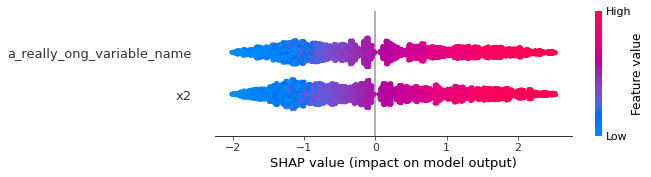

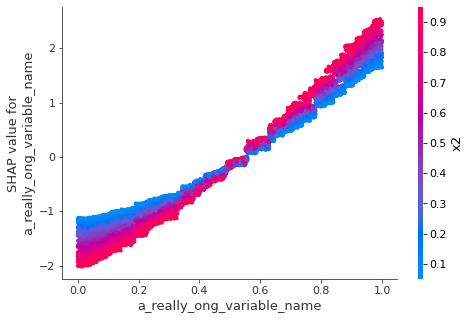

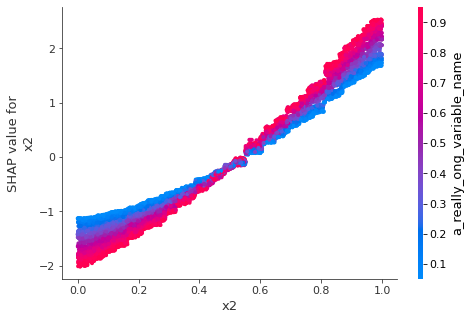

In [12]:
shap.initjs()
shap.summary_plot(shap3, X)

shap.dependence_plot("a_really_ong_variable_name", shap3, X)
shap.dependence_plot("x2", shap3, X)

shap.force_plot(shap3_ex.expected_value, shap3[0:100, :], X.iloc[0:100, :])

## KernelSHAP

In [63]:
bst3.predict(xgb.DMatrix(X))

array([2.299291  , 3.0019693 , 0.62150556, ..., 1.380363  , 2.789602  ,
       1.9710042 ], dtype=float32)

In [64]:
def predict_fn(a):
    df = pd.DataFrame(a, columns = ["x1", "x2"])
    dat = xgb.DMatrix(df)
    return bst1.predict(dat) * bst2.predict(dat)


kernel_2 = shap.KernelExplainer(predict_fn, X)

Using 10000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [59]:
np.array([x1,x2])

np.reshape(pd.DataFrame.to_numpy(X), (20000, 1))
test_val = np.array([[x1[1],x2[1]]])
# predict_fn(test_val)
test_val.shape
pd.DataFrame(test_val, columns = ["x1", "x2"])

,x1,x2
0,0.582277,0.648587


In [68]:
shap_values_kernel = kernel_2.shap_values(X.iloc[0:100,:])

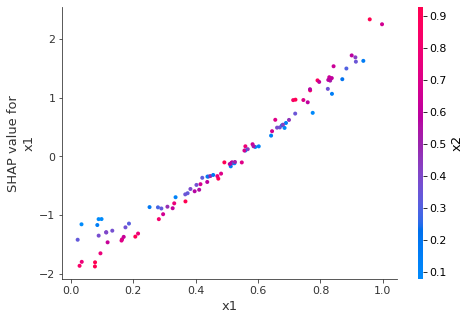

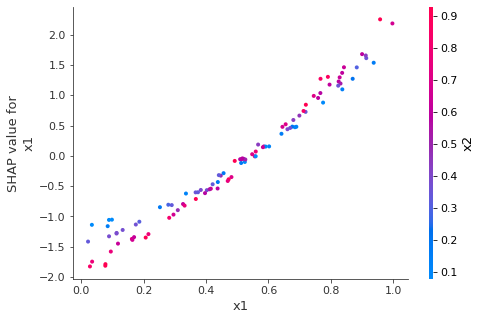

In [74]:
shap.dependence_plot("x1", shap3[0:100,:], X.iloc[0:100,:])
shap.dependence_plot("x1", shap_values_kernel, X.iloc[0:100,:])

In [75]:
kernel_2.expected_value

2.261084760086052

In [76]:
shap3_ex.expected_value

2.302656

In [8]:
import os
os.system('jupyter nbconvert --to html "kernelSHAP test.ipynb"')

0